In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO("./model/best.pt")

In [3]:
model.names

{0: 'Vehicle'}

In [4]:
cap = cv2.VideoCapture("./Dataset/video.mp4")

In [5]:
# Define line points
line_points = [(500, 250), (2000, 250)]
# Define Center
center = [1390,250]

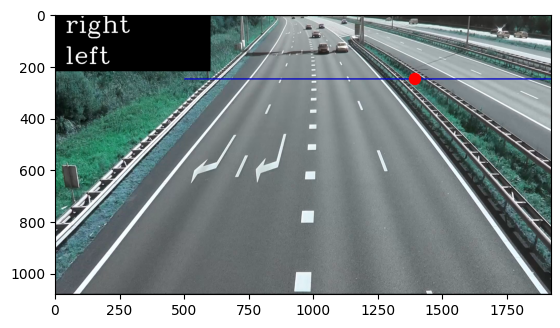

In [6]:
ans, frame = cap.read()
image_show = cv2.line(frame, line_points[0], line_points[1], (0,0,200), 4)
image_show = cv2.circle(image_show, center, 4, (255,0,0), 40)
image_show = cv2.rectangle(image_show, (0,0), (600,220), (0,0,0), -1)
image_show = cv2.putText(image_show, 'right', (40,70), cv2.FONT_HERSHEY_COMPLEX, 3, (255,255,255), 4)
image_show = cv2.putText(image_show, 'left', (40,190), cv2.FONT_HERSHEY_COMPLEX, 3, (255,255,255), 4)
plt.imshow(image_show)
plt.show()

In [7]:
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

In [8]:
# Video writer
video_writer = cv2.VideoWriter("object_counting_output.avi", cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

In [9]:
cap = cv2.VideoCapture("./Dataset/video.mp4")

car_count_right = 0
car_count_left = 0
id_list = []

while cap.isOpened():
    ans, frame = cap.read()
    results = model.track(frame, persist=True, show=False)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

    for i in range(len(results[0])):
        if results[0].boxes.id != None:
            bbox = results[0].boxes.xywh.numpy()[i]
            obj_id = results[0].boxes.id.numpy()[i]
            cx = bbox[0]
            cy = bbox[1]
    
            # Right
            if (cx > center[0]) and (cy > center[1]) and (obj_id not in id_list):
                car_count_right += 1
                id_list.append(obj_id)
            # Left
            elif (cx < center[0]) and (cy > center[1]) and (obj_id not in id_list):
                car_count_left += 1
                id_list.append(obj_id)
            
    frame_result = cv2.line(frame, line_points[0], line_points[1], (0,0,200), 4)
    frame_result = cv2.rectangle(frame_result, (0,0), (600,220), (0,0,0), -1)
    frame_result = cv2.putText(frame_result, f'right:{car_count_right}', (40,70), cv2.FONT_HERSHEY_COMPLEX, 3, (255,255,255), 4)
    frame_result = cv2.putText(frame_result, f'left:{car_count_left}', (40,190), cv2.FONT_HERSHEY_COMPLEX, 3, (255,255,255), 4)

    video_writer.write(frame_result)
cap.release()
video_writer.release()
cv2.destroyAllWindows()


0: 384x640 2 Vehicles, 483.7ms
Speed: 6.0ms preprocess, 483.7ms inference, 1919.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 444.8ms
Speed: 6.0ms preprocess, 444.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 454.8ms
Speed: 5.0ms preprocess, 454.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 472.8ms
Speed: 3.0ms preprocess, 472.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 484.7ms
Speed: 4.0ms preprocess, 484.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 506.7ms
Speed: 4.0ms preprocess, 506.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 548.5ms
Speed: 4.0ms preprocess, 548.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Vehicles, 433.8ms
Speed: 4.0ms preprocess, 433.8ms inference, 1.0ms postp

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\lkpyramid.cpp:1394: error: (-215:Assertion failed) prevPyr[level * lvlStep1].size() == nextPyr[level * lvlStep2].size() in function 'cv::`anonymous-namespace'::SparsePyrLKOpticalFlowImpl::calc'
